In [1]:
# import and load yalefaces data set as X
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

results=loadmat('yalefaces.mat')
X=results['X']

(a) Compute a 100 × 100 correlation matrix C where you will compute the dot product (correlation)
between the first 100 images in the matrix X. Thus each element is given by cjk = xT
j xk where xj is
the jth column of the matrix. Plot the correlation matrix using pcolor.

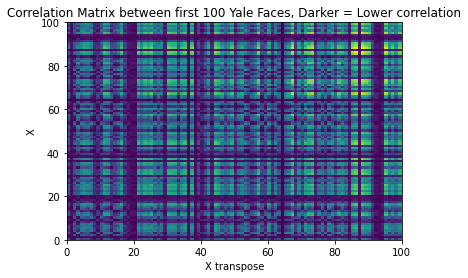

In [2]:
nfaces = 100
Xm=X[:, 0:nfaces]
C=np.matmul(Xm.T,Xm)

# plot results using pcolor
plt.pcolor(C)
plt.xlabel('X transpose')
plt.ylabel('X')
plt.title('Correlation Matrix between first 100 Yale Faces, Darker = Lower correlation')
plt.show()

(b) From the correlation matrix for part (a), which two images are most highly correlated? Which are
most uncorrelated? Plot these faces.

Text(0.5, 1.0, 'Most Correlated Images')

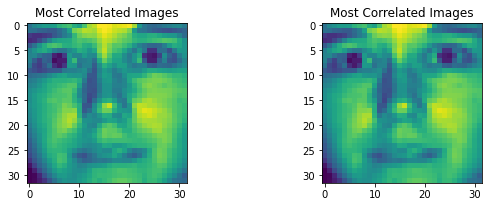

In [10]:
# find the most correlated images. We can expect these to be the same image since images are multiplied with themselves
# looking at the pcolor map above we see the yellow spots around 88,88 which align with what is found below

#print(C)
ind = np.unravel_index(np.argmax(C, axis=None), C.shape)

fig = plt.figure(figsize=(15, 10))

Xp = X[:, ind[0]].reshape((32, 32), order='F')
uplot = Xp.T
ax = fig.add_subplot(3, 3, 1)
ax.imshow(uplot)
ax.set_title('Most Correlated Images')
Xp = X[:, ind[1]].reshape((32, 32), order='F')
uplot = Xp.T
ax = fig.add_subplot(3, 3, 2)
ax.imshow(uplot)
ax.set_title('Most Correlated Images')

Text(0.5, 1.0, 'Least Correlated Images')

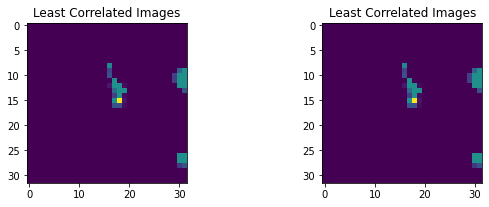

In [11]:
# find the least correlated images. This may also be the same image because it represents two images most "orthogonal"
#print(C)
ind = np.unravel_index(np.argmin(C, axis=None), C.shape)

fig = plt.figure(figsize=(15, 10))
Xp = X[:, ind[0]].reshape((32, 32), order='F')
uplot = Xp.T
ax = fig.add_subplot(3, 3, 1)
ax.imshow(uplot)
ax.set_title('Least Correlated Images')
Xp = X[:, ind[1]].reshape((32, 32), order='F')
uplot = Xp.T
ax = fig.add_subplot(3, 3, 2)
ax.imshow(uplot)
ax.set_title('Least Correlated Images')

(c) Repeat part (a) but now compute the 10 × 10 correlation matrix between images and plot the
correlation matrix between them.
[1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005].
(Just for clarification, the first image is labeled as one, not zero like python might do)

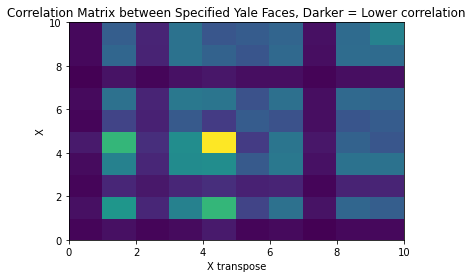

In [36]:
# just using the provided array of images to plot 
chosen = np.array([1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005])
Xm=X[:, chosen]
C=np.matmul(Xm.T,Xm)

# plot results using pcolor
plt.pcolor(C)
plt.xlabel('X transpose')
plt.ylabel('X')
plt.title('Correlation Matrix between Specified Yale Faces, Darker = Lower correlation')
plt.show()

(d) Create the matrix Y = XXT and find the first six eigenvectors with the largest magnitude eigenvalue.


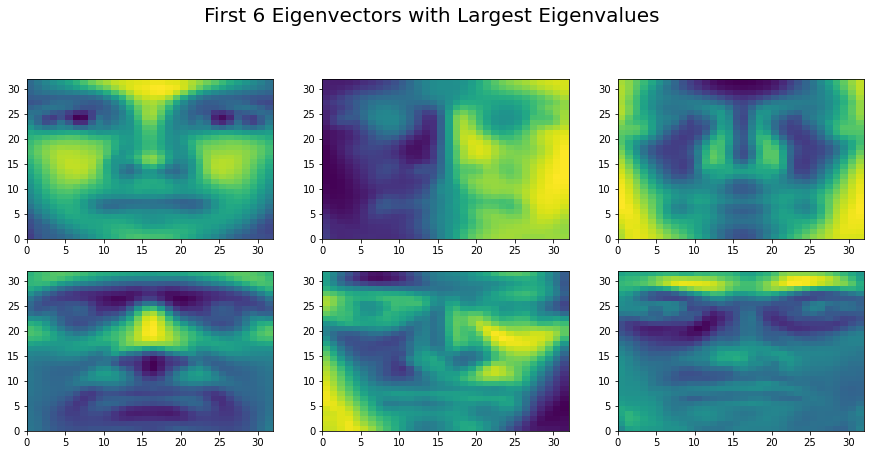

In [59]:
# create Y matrix
Y=np.matmul(X,X.T)

num = 6

#find eigenvectors and values
vals,vects = np.linalg.eig(Y)
fig = plt.figure(figsize=(15, 10))
fig.suptitle('First 6 Eigenvectors with Largest Eigenvalues', fontsize = 20)
for i in range(0,6):
    Vp = vects[:, i].reshape((32, 32), order='F')
    uplot = np.flip(Vp.T)
    ax = fig.add_subplot(3, 3, i+1)
    ax.pcolor(uplot)

(e) SVD the matrix X and find the first six principal component directions.

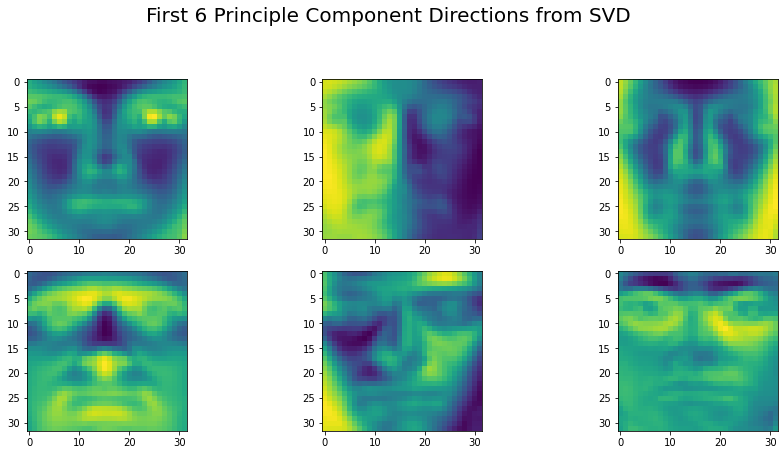

In [57]:
u,s,v=np.linalg.svd(X)
fig = plt.figure(figsize=(15, 10))
fig.suptitle('First 6 Principle Component Directions from SVD', fontsize = 20)
for k in range(6):
    Up = u[:, k].reshape((32, 32), order='F')
    uplot = Up.T
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot)

(f) Compare the first eigenvector v1 from (d) with the first SVD mode u1 from (e) and compute the
norm of difference of their absolute values.

In [54]:
# isolate vectors
v1 = sixvects[:,0]
u1 = u[0]

# compute the norm of the difference vector
dif = v1 - u1

norm = np.linalg.norm(dif)

print('Norm = ', norm)

Norm =  1.3912682128144278


(g) Compute the percentage of variance captured by each of the first 6 SVD modes. Plot the first 6
SVD modes

In [84]:
# the first 6 SVD modes are plotted above. 
# using the vector s we can see how each SVD mode has some amount of variance
firsts = s[0:6]
totalvar = np.sum(s)

# the percent variance is s for each mode / total s 
pervar = firsts / totalvar

print('Percentage of Variance capture by each of first 6 SVD modes: ', pervar)

Percentage of Variance capture by each of first 6 SVD modes:  [0.16614047 0.07605299 0.03116886 0.02665768 0.0155555  0.01497437]
